In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) # true labels for reference

print("Dataset shape:", X.shape)
X.head()

Dataset shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

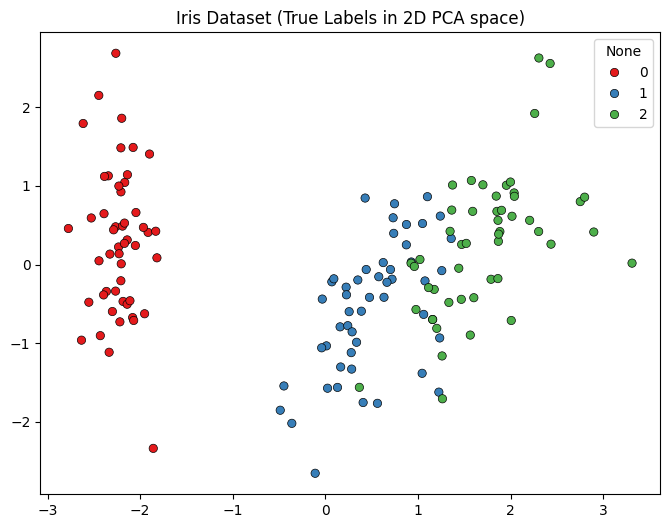

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", edgecolor="k")
plt.title("Iris Dataset (True Labels in 2D PCA space)")
plt.show()

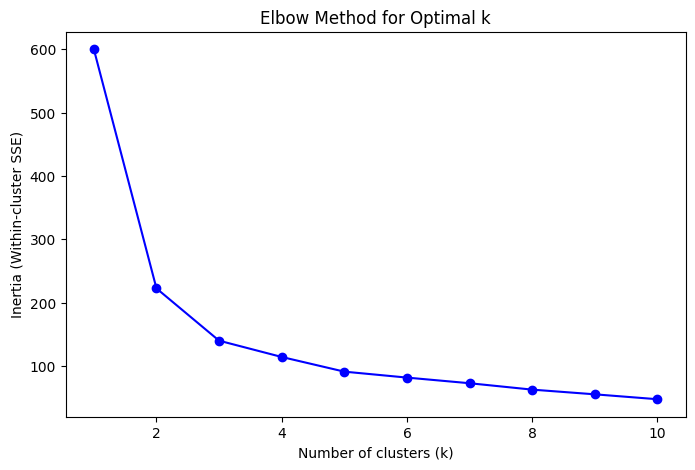

In [6]:
# Elbow Method to choose optimal k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [7]:
# KMeans with optimal k (let’s pick k=3 for Iris)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

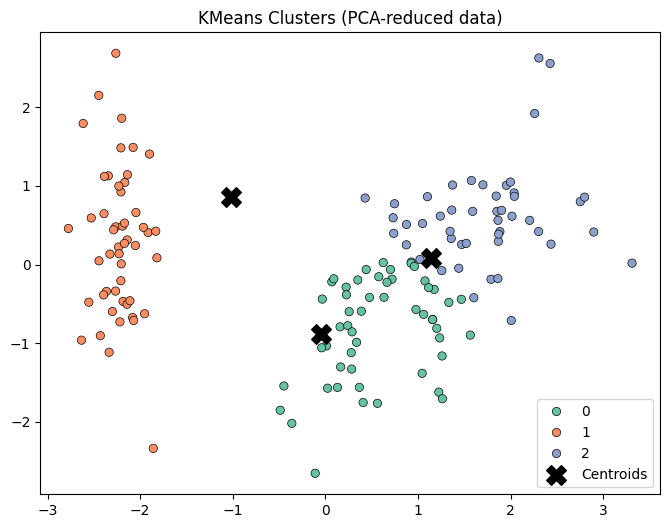

In [8]:
# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette="Set2", edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c="black", marker="X", label="Centroids")
plt.title("KMeans Clusters (PCA-reduced data)")
plt.legend()
plt.show()

In [9]:
# Evaluate Clustering using Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score for k=3:", score)

Silhouette Score for k=3: 0.45994823920518635
